In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

df_drug = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Read the Mouse and Drug Data and the Clinical Trial Data
df_drug.head()
df_trial.head()
df_drug.info()
df_trial.info()

# Combine the data into a single dataset
# both files have different number of rows and hence normal merge operation is not possible
# a New column with Drug name is added into the trial dataframe after reading drug dataframe

# making a lookup table(dictionary) for finding drug for a particular mouse
drug_dict = pd. Series(df_drug.Drug.values,index=df_drug['Mouse ID']).to_dict()
len(drug_dict)

#creating  Drug column in df_trial dataframe
for i in range (len(df_trial)):
    df_trial.loc[i,'Drug'] = drug_dict[df_trial.loc[i,'Mouse ID']]


# Display the data table for preview
df_trial.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
Mouse ID    250 non-null object
Drug        250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
df_temp= df_trial.drop(['Mouse ID', 'Metastatic Sites'], axis =1 )
tumor_response = df_temp.groupby(by = ['Drug', 'Timepoint']).mean()

# Preview DataFrame
tumor_response.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_temp= df_trial.drop(['Mouse ID', 'Metastatic Sites'], axis =1 )
stderr_tumor = df_temp.groupby(by = ['Drug', 'Timepoint']).sem()
# Convert to DataFrame

# Preview DataFrame
stderr_tumor.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
df_temp = df_trial.pivot_table(index = 'Timepoint', values= 'Tumor Volume (mm3)', columns ='Drug', aggfunc= np.mean)
df_temp.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


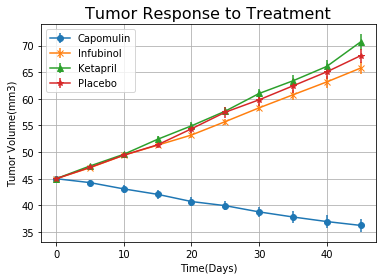

In [6]:
# Generate the Plot (with Error Bars)
x = np.array(df_temp.index.tolist())
drugs_to_plot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] 
#drugs_to_plot
marker = np.array(['o', 'x', '^', '*'])
#marker

fig, ax = plt.subplots()
for i in range (len(drugs_to_plot)):
    ax.errorbar(x,  df_temp[drugs_to_plot[i]], yerr=stderr_tumor.loc[drugs_to_plot[i],'Tumor Volume (mm3)'], marker=marker[i], label =drugs_to_plot[i])

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume(mm3)")
ax.grid()
ax.legend()
ax.set_title("Tumor Response to Treatment", fontsize = 16)

 
# Save the Figure
fig.savefig("Tumor response.pdf")


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
df_temp= df_trial.drop(['Mouse ID', 'Tumor Volume (mm3)'], axis =1 )
matastatic_response = df_temp.groupby(by = ['Drug', 'Timepoint']).mean()
matastatic_response.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

stderr_matastatic = df_temp.groupby(by = ['Drug', 'Timepoint']).sem()
# Convert to DataFrame
stderr_matastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

df_temp1 = df_trial.pivot_table(index = 'Timepoint', values= 'Metastatic Sites', columns ='Drug', aggfunc= np.mean)
df_temp1.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


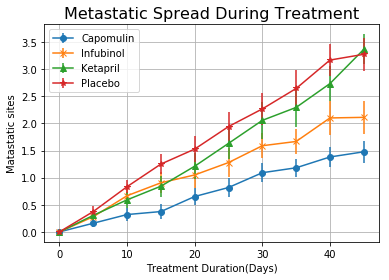

In [10]:
# Generate the Plot (with Error Bars)
x = np.array(df_temp1.index.tolist())
drugs_to_plot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] 
marker = np.array(['o', 'x', '^', '*'])


fig1, ax1 = plt.subplots()
for i in range (len(drugs_to_plot)):
    ax1.errorbar(x,  df_temp1[drugs_to_plot[i]],yerr = stderr_matastatic.loc[drugs_to_plot[i],'Metastatic Sites'], marker=marker[i], label =drugs_to_plot[i])

ax1.set_xlabel("Treatment Duration(Days)")
ax1.set_ylabel("Matastatic sites")
ax1.grid()
ax1.legend()
ax1.set_title("Metastatic Spread During Treatment", fontsize = 16)
 
# Save the Figure
fig1.savefig("Metastatic spread.pdf")



## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
mice_count =df_trial.pivot_table(index = ['Drug', 'Timepoint'], values = 'Mouse ID', aggfunc = len)
mice_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_reformat =df_trial.pivot_table(index = 'Timepoint', values = 'Mouse ID', columns = 'Drug', aggfunc = len)
# Preview the Data Frame
mice_count_reformat.head()
mice_count_reformat.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

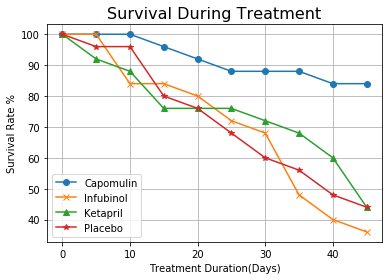

In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
x = np.array(df_temp1.index.tolist())
drugs_to_plot = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] 
marker = np.array(['o', 'x', '^', '*'])


fig2, ax2 = plt.subplots()
for i in range (len(drugs_to_plot)):
    ax2.plot(x,   (100*mice_count_reformat[drugs_to_plot[i]]/mice_count_reformat.loc[0, drugs_to_plot[i]]), marker=marker[i], label =drugs_to_plot[i])

ax2.set_xlabel("Treatment Duration(Days)")
ax2.set_ylabel("Survival Rate %")
ax2.grid()
ax2.legend()
ax2.set_title("Survival During Treatment", fontsize = 16)
 
# Save the Figure
fig2.savefig("Survival_Rate.pdf")



plt.show()

## Summary Bar Graph

In [14]:
#Summarizing results in a dictionary as {'drug name: % tumour volume change'}
drug_results_dict={}
drugs = df_temp['Drug'].unique()
for drug in drugs:
    start_tumor_size = tumor_response.loc[(drug,0), 'Tumor Volume (mm3)']
    end_tumor_size = tumor_response.loc[(drug,45), 'Tumor Volume (mm3)']
    percentage_change = round(100*(end_tumor_size - start_tumor_size)/start_tumor_size,2)
    drug_results_dict.update({drug: percentage_change})

drug_results_dict
# also converting to a dataframe
drug_results_df = pd.DataFrame(pd.Series(drug_results_dict))
drug_results_df


,0
Capomulin,-19.48
Ketapril,57.03
Naftisol,53.92
Infubinol,46.12
Stelasyn,52.09
Ramicane,-22.32
Propriva,47.24
Zoniferol,46.58
Placebo,51.30
Ceftamin,42.52


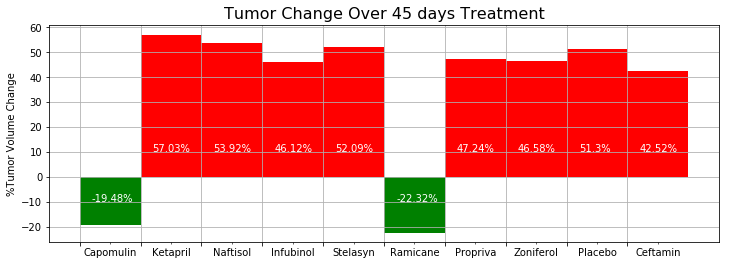

In [15]:
fig3, ax3 = plt.subplots(figsize=(12,4))
x = drug_results_df.index
y=  drug_results_df[0]

#conditional setting of bar color using: color=(df conditional).map({True: 'red', False: 'green'})
ax3.bar(x,y, width=1, align = 'edge', color = (drug_results_df[0]>0).map({True:'r', False:'g'}))

#The gap between is determined by the width of the bars and the X axis ticks: gap=(x2-x1)-width, changed default width of 0.8 to 1 above

ax3.grid()
ax3.set_title("Tumor Change Over 45 days Treatment", fontsize = 16)
ax3.set_ylabel("%Tumor Volume Change")

# Orient widths. Add labels, tick marks, etc. 

#Moving x -axis labels to centre of bars
# Hide existing major tick labels
ax3.set_xticklabels('')
# Customize minor tick locations 
ax3.set_xticks(np.arange(0.5, 10.5), minor=True)
# Customize minor tick labels 
xlabels = np.array(drug_results_df.index.tolist())
ax3.set_xticklabels(xlabels, minor=True)

# label the percentages of changes (y axis position of text depending on +ve or -ve response)
for i in range (len(xlabels)):
    ax3.text(i+.2,(10 if drug_results_dict[xlabels[i]]>0 else -10) ,f"{drug_results_dict[xlabels[i]]}%", color ='white')

    
# Save the Figure
fig3.savefig("drug_results.pdf")


plt.show()


## Observable Trends:
1. 'Capomulin' and 'Ramiken' are observed with positive impact with reduction in tumor volume.
2. Both 'Capomulin' and 'Ramiken' are also observed with better survival rate over the duration of study (80%+) in comparison to other drugs
3. Both 'Capomulin' and 'Ramiken' are also observed with better Metastatic response (lower Metastatic spread) over the duration of study in comparison to other drugs

an excellent web page to learn text handling in matplotlib:
    http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/